In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
data=pd.read_excel("C:/Users/dell/Downloads/SHG_Booking_Data.xlsx", header=0)

In [63]:
data.head()

,Booking ID,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Status,Status Update,Cancelled (0/1),Revenue,Revenue Loss
0,1,Resort,2014-07-24,2015-07-01,342,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0
1,2,Resort,2013-06-24,2015-07-01,737,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0
2,3,Resort,2015-06-24,2015-07-01,7,1,1,Direct,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0
3,4,Resort,2015-06-18,2015-07-01,13,1,1,Corporate,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0
4,5,Resort,2015-06-17,2015-07-01,14,2,2,Online Travel Agent,Transient,United Kingdom,No Deposit,98.0,Check-Out,2015-07-03,0,196.0,0.0


<b> Cancellation against Deposit Type

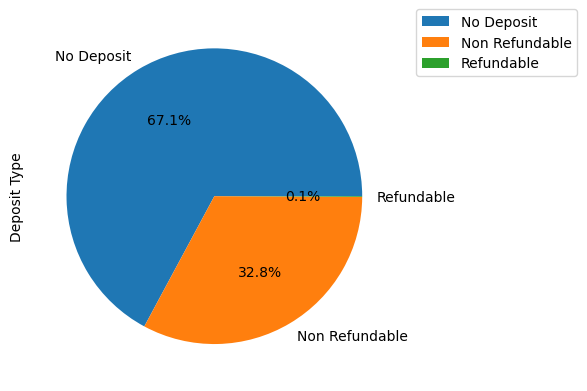

In [64]:
dr=data[data['Cancelled (0/1)']==1]
dr['Deposit Type'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.legend(loc='upper right',bbox_to_anchor=(1.5,1.025))

<h2> Trend booking per year

In [65]:
data['book_year']=data['Booking Date'].dt.year

<Axes: xlabel='book_year'>

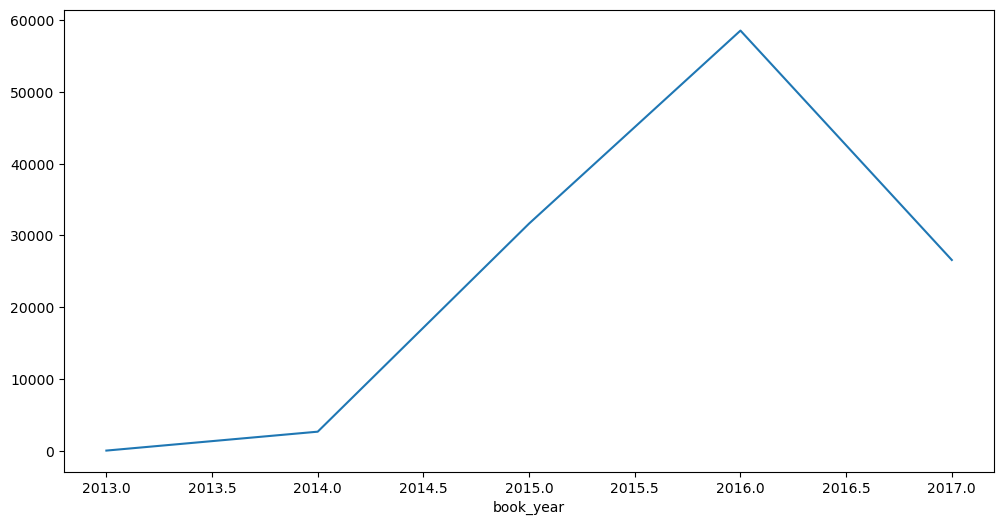

In [68]:
data['Booking ID'].groupby(data['book_year']).agg('count').plot(kind='line',figsize=(12,6))

<b> Average Lead Time according to Customer Type

<Axes: ylabel='Lead Time'>

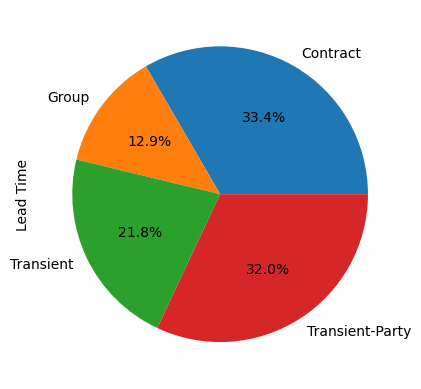

In [70]:
data['Lead Time'].groupby(data['Customer Type']).agg('mean').plot(kind='pie',autopct='%1.1f%%')



<h2> <b> Customer Behaviour Analysis

<b> Which distribution channel contribute the most to bookings

<Axes: >

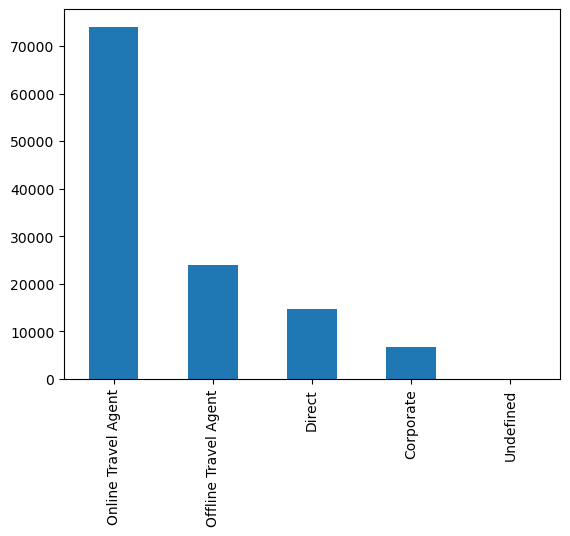

In [72]:
dc=data['Distribution Channel'].value_counts()
dc.plot(kind='bar')

<b> Average Revenue generated per Customer Type

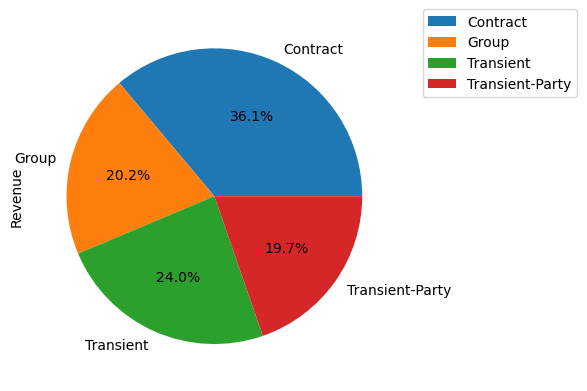

In [73]:
data['Revenue'].groupby(data['Customer Type']).agg('mean').plot(kind='pie', autopct='%1.1f%%')
plt.legend(loc='upper right',bbox_to_anchor=(1.5,1.025))


<b> how does the average daily rate (ADR) differ across these channels?

In [74]:
dc=data['Avg Daily Rate'].groupby(data['Distribution Channel']).agg('mean')
dc.head()

Distribution Channel
Corporate                69.325204
Direct                  106.654983
Offline Travel Agent     87.145444
Online Travel Agent     108.567791
Undefined                46.240000
Name: Avg Daily Rate, dtype: float64

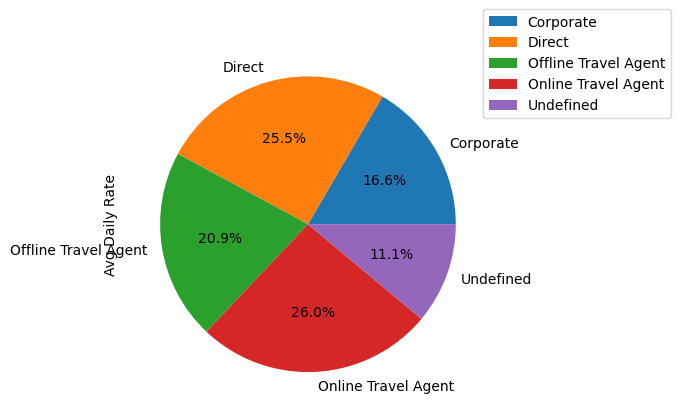

In [77]:
dc.plot(kind='pie',autopct='%1.1f%%')
plt.legend(loc='upper right',bbox_to_anchor=(1.5,1.1))

explanation: from the values we can see that the top ten countries which have the most bookings are portugal, UK, france, spain, germany, italy, ireland, belgium china, and brazil.
    All these countries are first world countries (countries with well off citizens)

<b> Can we identify any patterns in the distribution of guests based on their country of origin, 

In [78]:
con_gue=data['Booking ID'].groupby(data['Country']).agg('count')

In [84]:
#top 10 countries with the highest number of guests
con_gue=con_gue.sort_values(ascending=False)
con_guests=con_gue[:10]

In [85]:
con_guests

Country
Portugal          48590
United Kingdom    12129
France            10415
Spain              8568
Germany            7287
Italy              3766
Ireland            3375
Belgium            2342
China              2280
Brazil             2224
Name: Booking ID, dtype: int64

<Axes: xlabel='Country'>

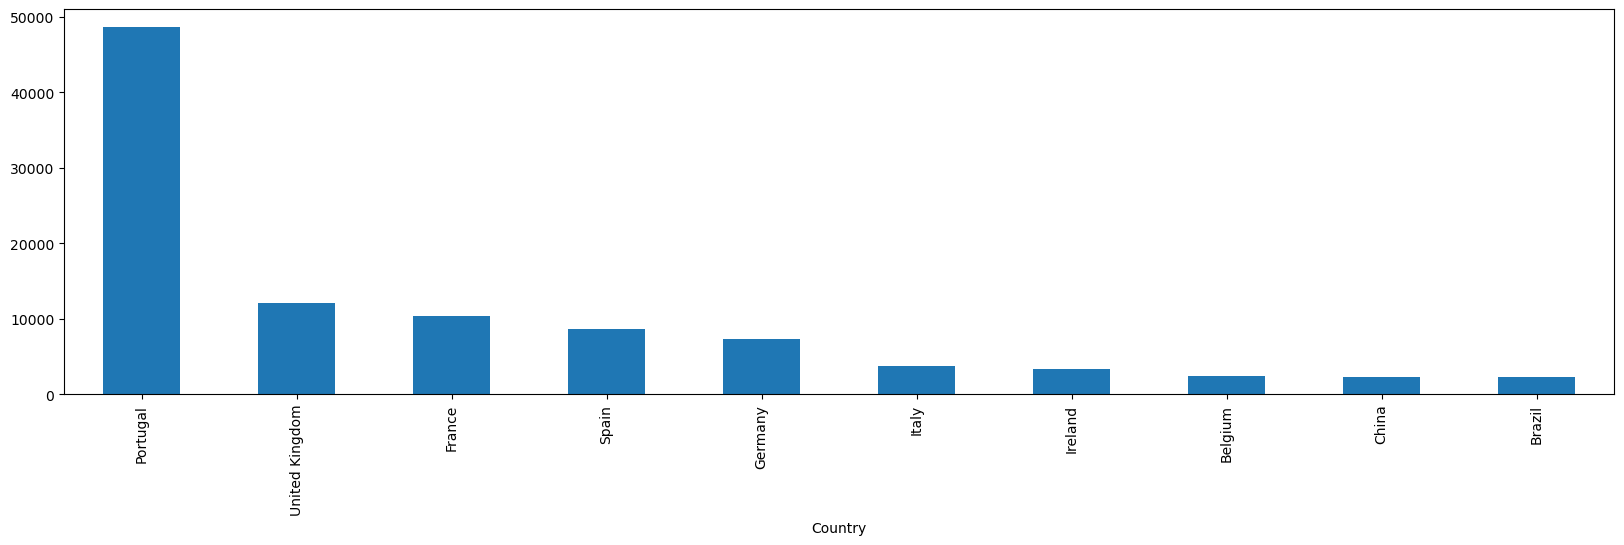

In [86]:
con_guests.plot(kind='bar', figsize=(20,5))

<b> 20 Countries with highest revenues

In [87]:
dr=data['Revenue'].groupby(data['Country']).agg('sum').sort_values(ascending=False)
hr=dr.head(20)

<Axes: xlabel='Country'>

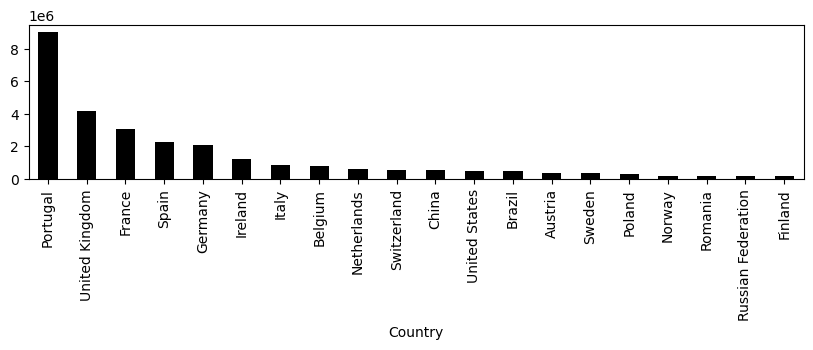

In [88]:
hr.plot(kind='bar', color='black', figsize=(10,2))

<b> Top 20 countries with the highest revenue loss

In [89]:
dr=data['Revenue Loss'].groupby(data['Country']).agg('sum').sort_values(ascending=True)
r=dr.head(20) 

Text(0, 0.5, 'Country')

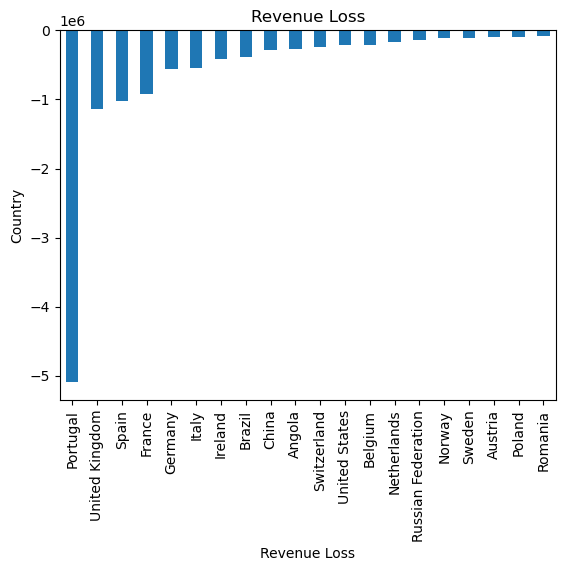

In [90]:
r.plot(kind='bar')
plt.title('Revenue Loss')
plt.xlabel('Revenue Loss')
plt.ylabel('Country')

<h2> Cancellation Analysis

<b> ●	What factors are most strongly correlated with cancellations

In [91]:
data.columns

Index(['Booking ID', 'Hotel', 'Booking Date', 'Arrival Date', 'Lead Time',
       'Nights', 'Guests', 'Distribution Channel', 'Customer Type', 'Country',
       'Deposit Type', 'Avg Daily Rate', 'Status', 'Status Update',
       'Cancelled (0/1)', 'Revenue', 'Revenue Loss', 'book_year'],
      dtype='object')

In [92]:
data['Status'].value_counts()
sta={'Check-Out':1,
    'Canceled':2,
    'No-Show':3}
data['status']=data['Status'].map(sta)

<b> Explanation: From the correlation analysis, the most strongly correlated variables to Cancellation are Lead time, month, avg daily rate, no of guests, and nights

In [93]:
target=['Cancelled (0/1)']
cor=data.corr()
co=cor[target]

C:\Users\dell\AppData\Local\Temp\ipykernel_7912\1151593385.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=data.corr()


In [94]:
co.sort_values(by=target, ascending=False)

,Cancelled (0/1)
Cancelled (0/1),1.000000
status,0.980601
Lead Time,0.293123
Avg Daily Rate,0.047557
Guests,0.046522
Nights,0.017779
book_year,-0.114481
Booking ID,-0.242238
Revenue,-0.424228
Revenue Loss,-0.517136


<b>●	How does the revenue loss from cancellations compare across different customer segments and distribution channels?

In [95]:
df=data[data['Cancelled (0/1)']==1]
dat=df['Revenue Loss'].groupby(df['Customer Type']).agg('sum')
da=df['Revenue Loss'].groupby(df['Distribution Channel']).agg('sum')


<b> Revenue Loss across Customer Type
<br> From the analysis, Transient customers bring about the highest revenue loss due to cancellation

In [96]:
dat

Customer Type
Contract            -283888.62
Group                -17325.19
Transient         -11502290.03
Transient-Party    -1319396.25
Name: Revenue Loss, dtype: float64

<Axes: xlabel='Customer Type'>

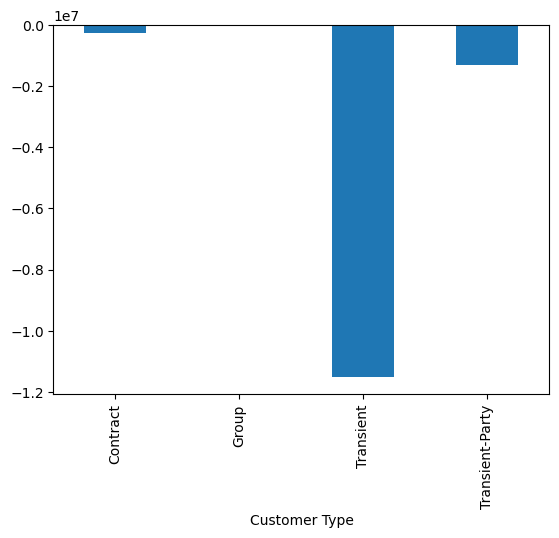

In [97]:
dat.plot(kind='bar')

Revenue Loss across Distribution Channel
<br>
From the analysis, offline distribution channel bring about the highest revenue loss due to cancellation



In [98]:
da

Distribution Channel
Corporate                -195598.69
Direct                  -1033280.81
Offline Travel Agent    -1110542.27
Online Travel Agent    -10782870.82
Undefined                   -607.50
Name: Revenue Loss, dtype: float64

<Axes: xlabel='Distribution Channel'>

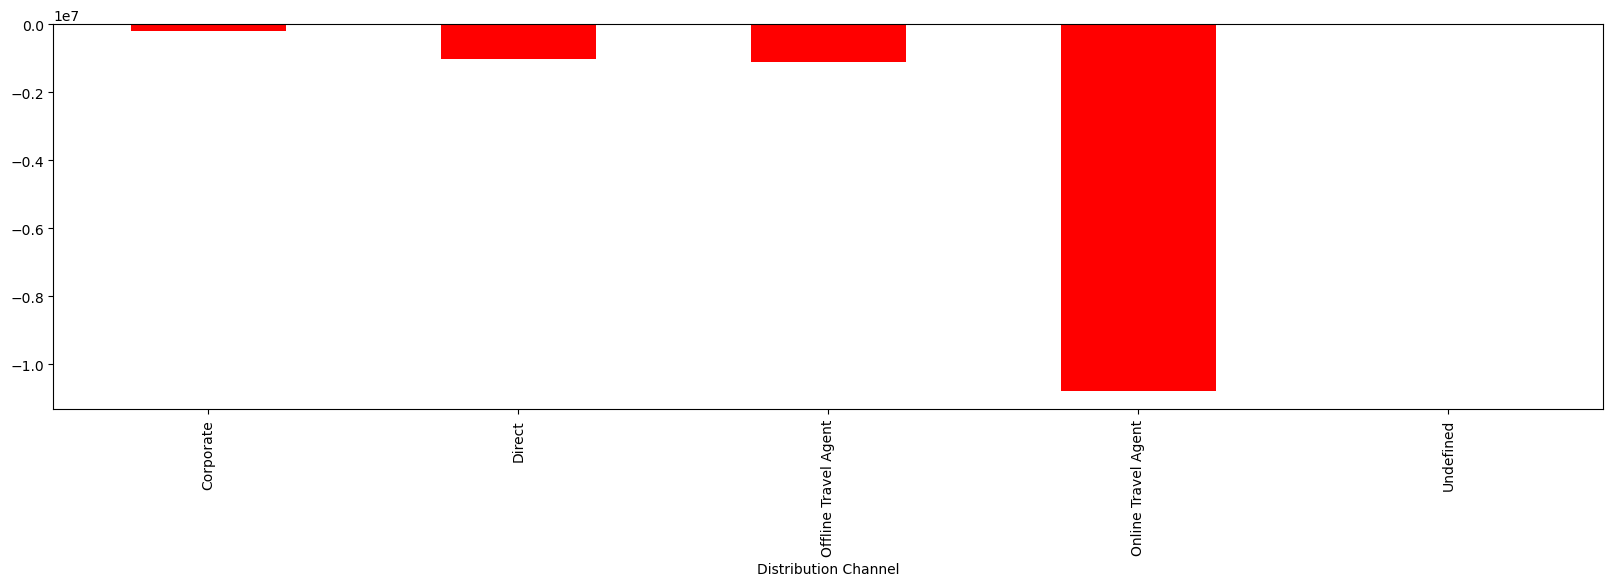

In [99]:
da.plot(kind='bar', figsize=(20,5), color='r')

<h2> Revenue Optimization

<b> ●	What is the overall revenue trend

In [100]:
data.head()

,Booking ID,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Status,Status Update,Cancelled (0/1),Revenue,Revenue Loss,book_year,status
0,1,Resort,2014-07-24,2015-07-01,342,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0,2014,1
1,2,Resort,2013-06-24,2015-07-01,737,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0,2013,1
2,3,Resort,2015-06-24,2015-07-01,7,1,1,Direct,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0,2015,1
3,4,Resort,2015-06-18,2015-07-01,13,1,1,Corporate,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0,2015,1
4,5,Resort,2015-06-17,2015-07-01,14,2,2,Online Travel Agent,Transient,United Kingdom,No Deposit,98.0,Check-Out,2015-07-03,0,196.0,0.0,2015,1


In [101]:
#calculating the revenue according to year
rev_year=data.groupby(data['book_year']).agg('sum')
rev_year

C:\Users\dell\AppData\Local\Temp\ipykernel_7912\3833317903.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rev_year=data.groupby(data['book_year']).agg('sum')


,Booking ID,Lead Time,Nights,Guests,Avg Daily Rate,Cancelled (0/1),Revenue,Revenue Loss,status
book_year,,,,,,,,,
2013,2,737,0,2,0.00,0,0.00,0.00,1
2014,189653287,824472,7114,5506,192975.00,2379,387451.22,-167922.26,5015
2015,1352831299,4190042,110306,59384,2719091.38,12456,7727179.52,-1982860.73,44382
2016,3629838269,5795643,203785,116786,5964959.96,20987,13922674.13,-7071275.70,80209
2017,1954722888,1607029,88052,53310,3280591.26,8402,7563292.57,-3900841.40,35214


<Axes: xlabel='book_year'>

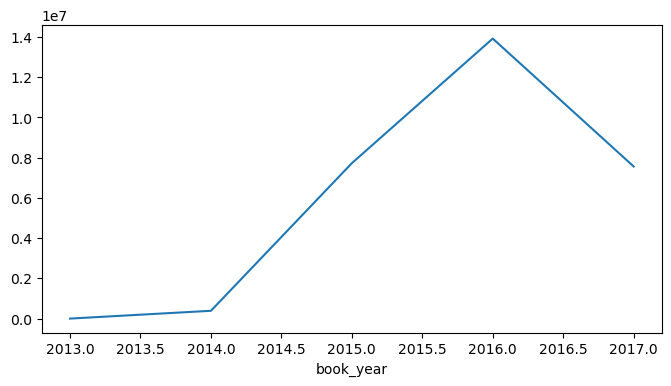

In [102]:
rev_year['Revenue'].plot(kind='line', figsize=(8,4))

<Axes: ylabel='book_year'>

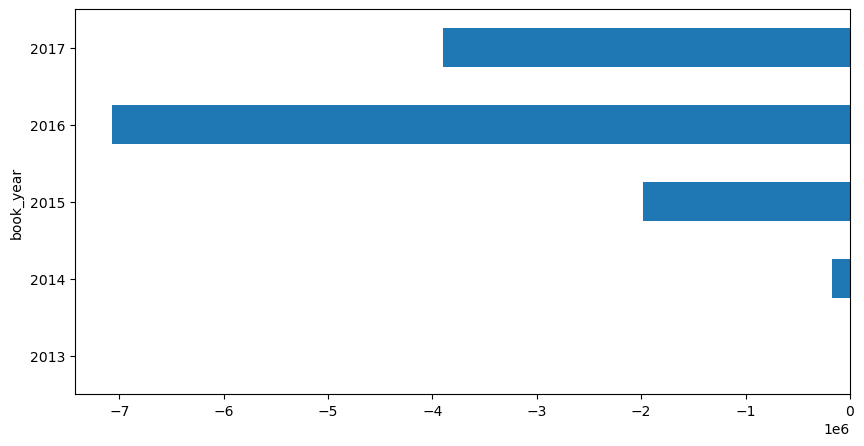

In [103]:
rev_year['Revenue Loss'].plot(kind='barh', figsize=(10,5))

<Axes: ylabel='book_year'>

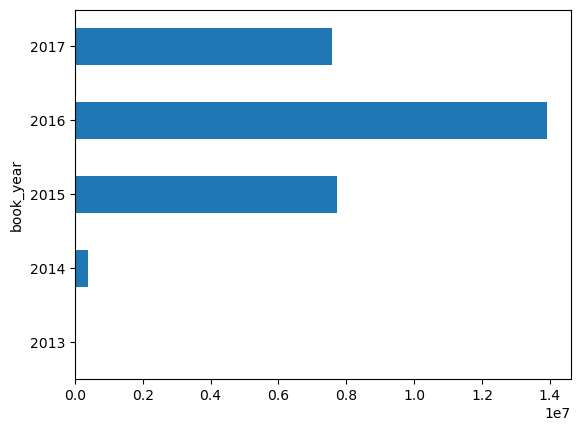

In [104]:
rev_year['Revenue'].plot(kind='barh')

<b>are there specific customer segments, distribution channels, or countries contributing significantly to revenue?

From the analysis, Transient customers contribute the highest to revenue.

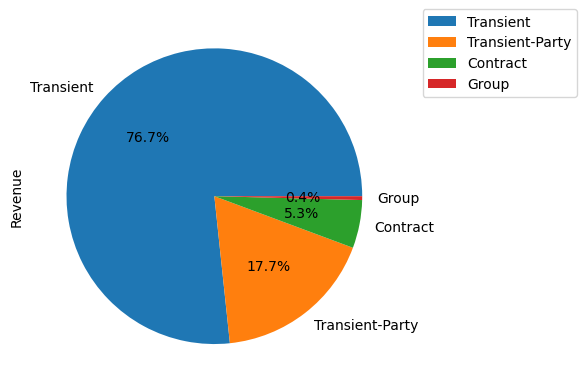

In [105]:
# for the customer segments, we can find the customer type with the highest revenues
cus_rev=data['Revenue'].groupby(data['Customer Type']).agg('sum').sort_values(ascending=False)
cus_rev.plot(kind='pie',autopct='%1.1f%%')
plt.legend(loc='upper right',bbox_to_anchor=(1.5,1.025))
#

Distribution channels contributiing to revenue

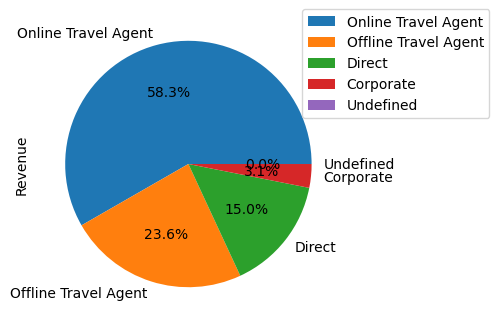

In [107]:
# for the customer segments, we can find the distribution channel with the highest revenues
cus_rev=data['Revenue'].groupby(data['Distribution Channel']).agg('sum').sort_values(ascending=False)
cus_rev.plot(kind='pie',autopct='%1.1f%%', figsize=(12,4))
plt.legend(loc='upper right')
plt.legend(loc='upper right',bbox_to_anchor=(1.5,1.025))

<Axes: xlabel='Country'>

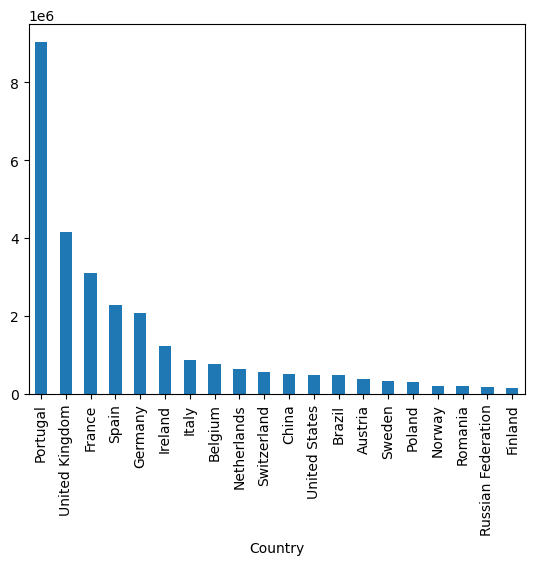

In [108]:
#Top 20 Countries contributing to revenue
con_rev=data['Revenue'].groupby(data['Country']).agg('sum').sort_values(ascending=False)
con_rev[:20].plot(kind='bar')

<h2> Geographical Analysis

●	How does the distribution of guests vary across different countries

In [109]:
#find the number of guests from each country
con_gue=data['Guests'].groupby(data['Country']).agg('sum').sort_values(ascending=False)
con_gue

Country
Portugal                       90036
United Kingdom                 24568
France                         21579
Spain                          18153
Germany                        14198
                               ...  
Sierra Leone                       2
French Southern Territories        2
New Caledonia                      2
Guyana                             1
Kiribati                           1
Name: Guests, Length: 174, dtype: int64

In [110]:
#top 50 countries with the highest number of guests
top_50=con_gue[:50]

Question: Are there specific countries that should be targeted for marketing efforts?
<br> Answer: Based on the analysis, for countries that should be targeted, I would focus on the top 10 or 15 countries with the highest number of guests and those which bring the highest revenue, namely:
    Portugal, United Kingdom, France, Spain, Germany, Italy, Ireland, Belgium, Brazil, China, United States, Nertherlands, Switzerland, Austria, and Sweden

<Axes: xlabel='Country'>

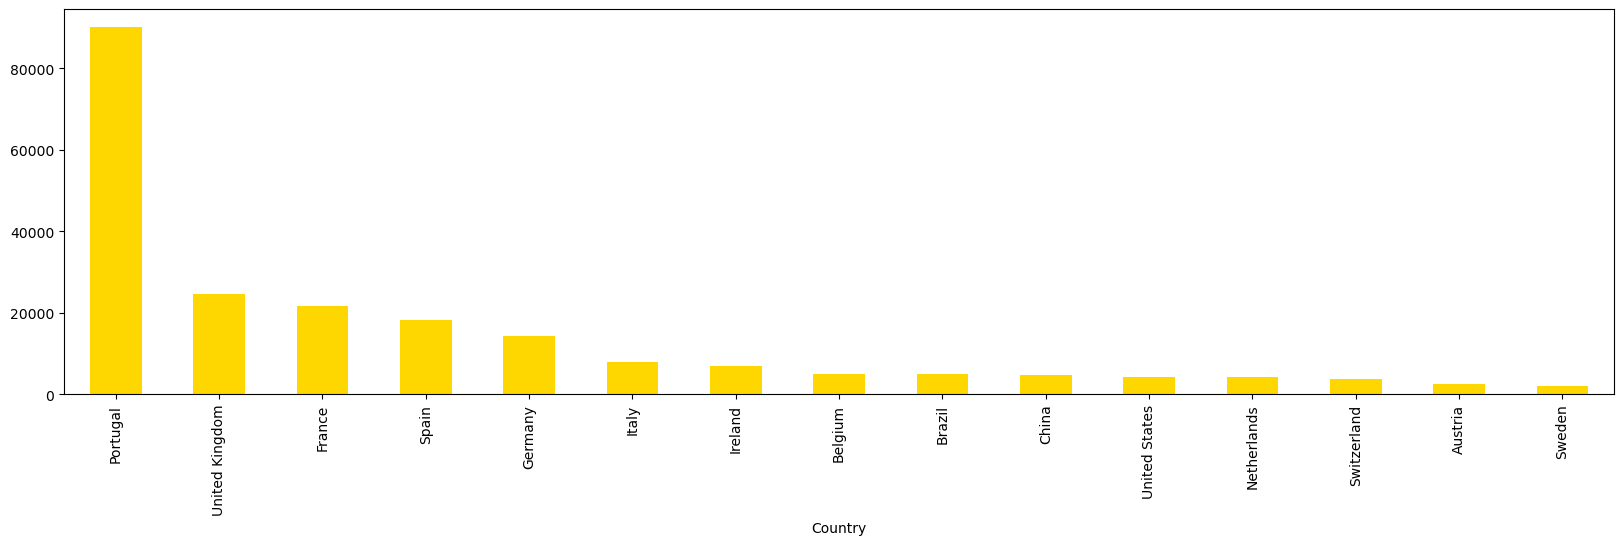

In [111]:
#visualize the top 20 countries with the highest number of guests
con_gue[:15].plot(kind='bar', figsize=(20,5), color='gold')

<h2> Operational Efficiency

●	What is the average length of stay for guests, and how does it differ based on booking channels or customer types?

In [112]:
data['Nights'].mean() #average length of stay for guests

3.4279001591423066

average length based on distribution channel

In [114]:
avg_book=data['Nights'].groupby(data['Distribution Channel']).agg('mean')
avg_book

Distribution Channel
Corporate               2.380710
Direct                  3.194333
Offline Travel Agent    3.922346
Online Travel Agent     3.408332
Undefined               3.400000
Name: Nights, dtype: float64

<Axes: xlabel='Distribution Channel'>

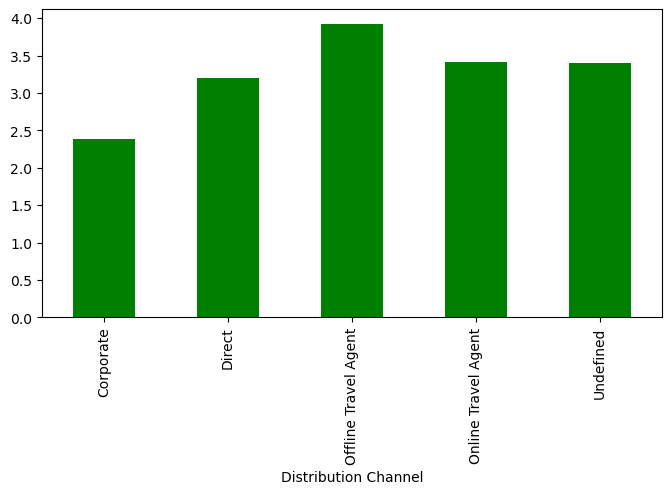

In [118]:
avg_book.plot(kind='bar',figsize=(8,4),color='g')

based on customer type

In [116]:
avg_cus=data['Nights'].groupby(data['Customer Type']).agg('mean')
avg_cus

Customer Type
Contract           5.320658
Group              2.882149
Transient          3.447145
Transient-Party    3.064719
Name: Nights, dtype: float64

<Axes: xlabel='Customer Type'>

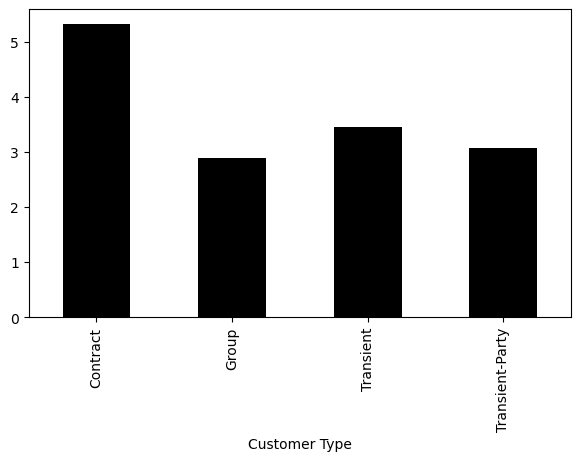

In [117]:
avg_cus.plot(kind='bar', figsize=(7,4), color='black')

<h2> Impact of Deposit Types

●	How does the presence or absence of a deposit impact the likelihood of cancellations 

The absence of a deposit increases the likelihood of cancellations. Out of 104167 bookings with no deposits, 28,473 people canceled their bookings which is about 27% of people with no deposits.
<br> Out of 14573 bookings which were no refundable, 99% (14446) of those bookings were cancelled.
<br> Therefore, the presnce or absence of deposit does not have a significant impact on cancellation. why? in the case of non refundable deposits, 99% of people were willing to let go of the deposit and go ahead to cancel their bookings

In [119]:
data['Deposit Type'].value_counts()

No Deposit        104641
Non Refundable     14587
Refundable           162
Name: Deposit Type, dtype: int64

In [120]:
tt=data[data['Deposit Type']=='No Deposit']
tt['Status'].value_counts(normalize=True)

Check-Out    0.71623
Canceled     0.27257
No-Show      0.01120
Name: Status, dtype: float64

In [121]:
tt=data[data['Deposit Type']=='Non Refundable']
tt['Status'].value_counts()

Canceled     14460
Check-Out       93
No-Show         34
Name: Status, dtype: int64

●	How does the presence or absence of a deposit impact revenue generation?

from the analysis, bookings with no deposit had the highest revenue of 25950163.33 compared to bookings with non-refundable deposits.
<br> the presence of deposits do not affect revenue generation of SHG 

In [122]:
rev_gen=data['Revenue'].groupby(data['Deposit Type']).agg('sum')

In [124]:
rev_gen

Deposit Type
No Deposit        25950163.33
Non Refundable     3621446.90
Refundable           28987.21
Name: Revenue, dtype: float64

●	Can we identify any patterns in the use of deposit types across different customer segments?

In [125]:
dat=data[['Customer Type','Deposit Type']]

In [126]:
dat=data['Customer Type'].groupby([data['Customer Type'],data['Deposit Type']]).agg('count')

In [127]:
hh=pd.DataFrame(dat)

In [128]:
hh.columns=['customer']
hh

customer
Customer Type   Deposit Type            
Contract        No Deposit          3530
                Non Refundable       544
                Refundable             2
Group           No Deposit           569
                Refundable             8
Transient       No Deposit         76684
                Non Refundable     12909
                Refundable            20
Transient-Party No Deposit         23858
                Non Refundable      1134
                Refundable           132

<Axes: xlabel='Customer Type'>

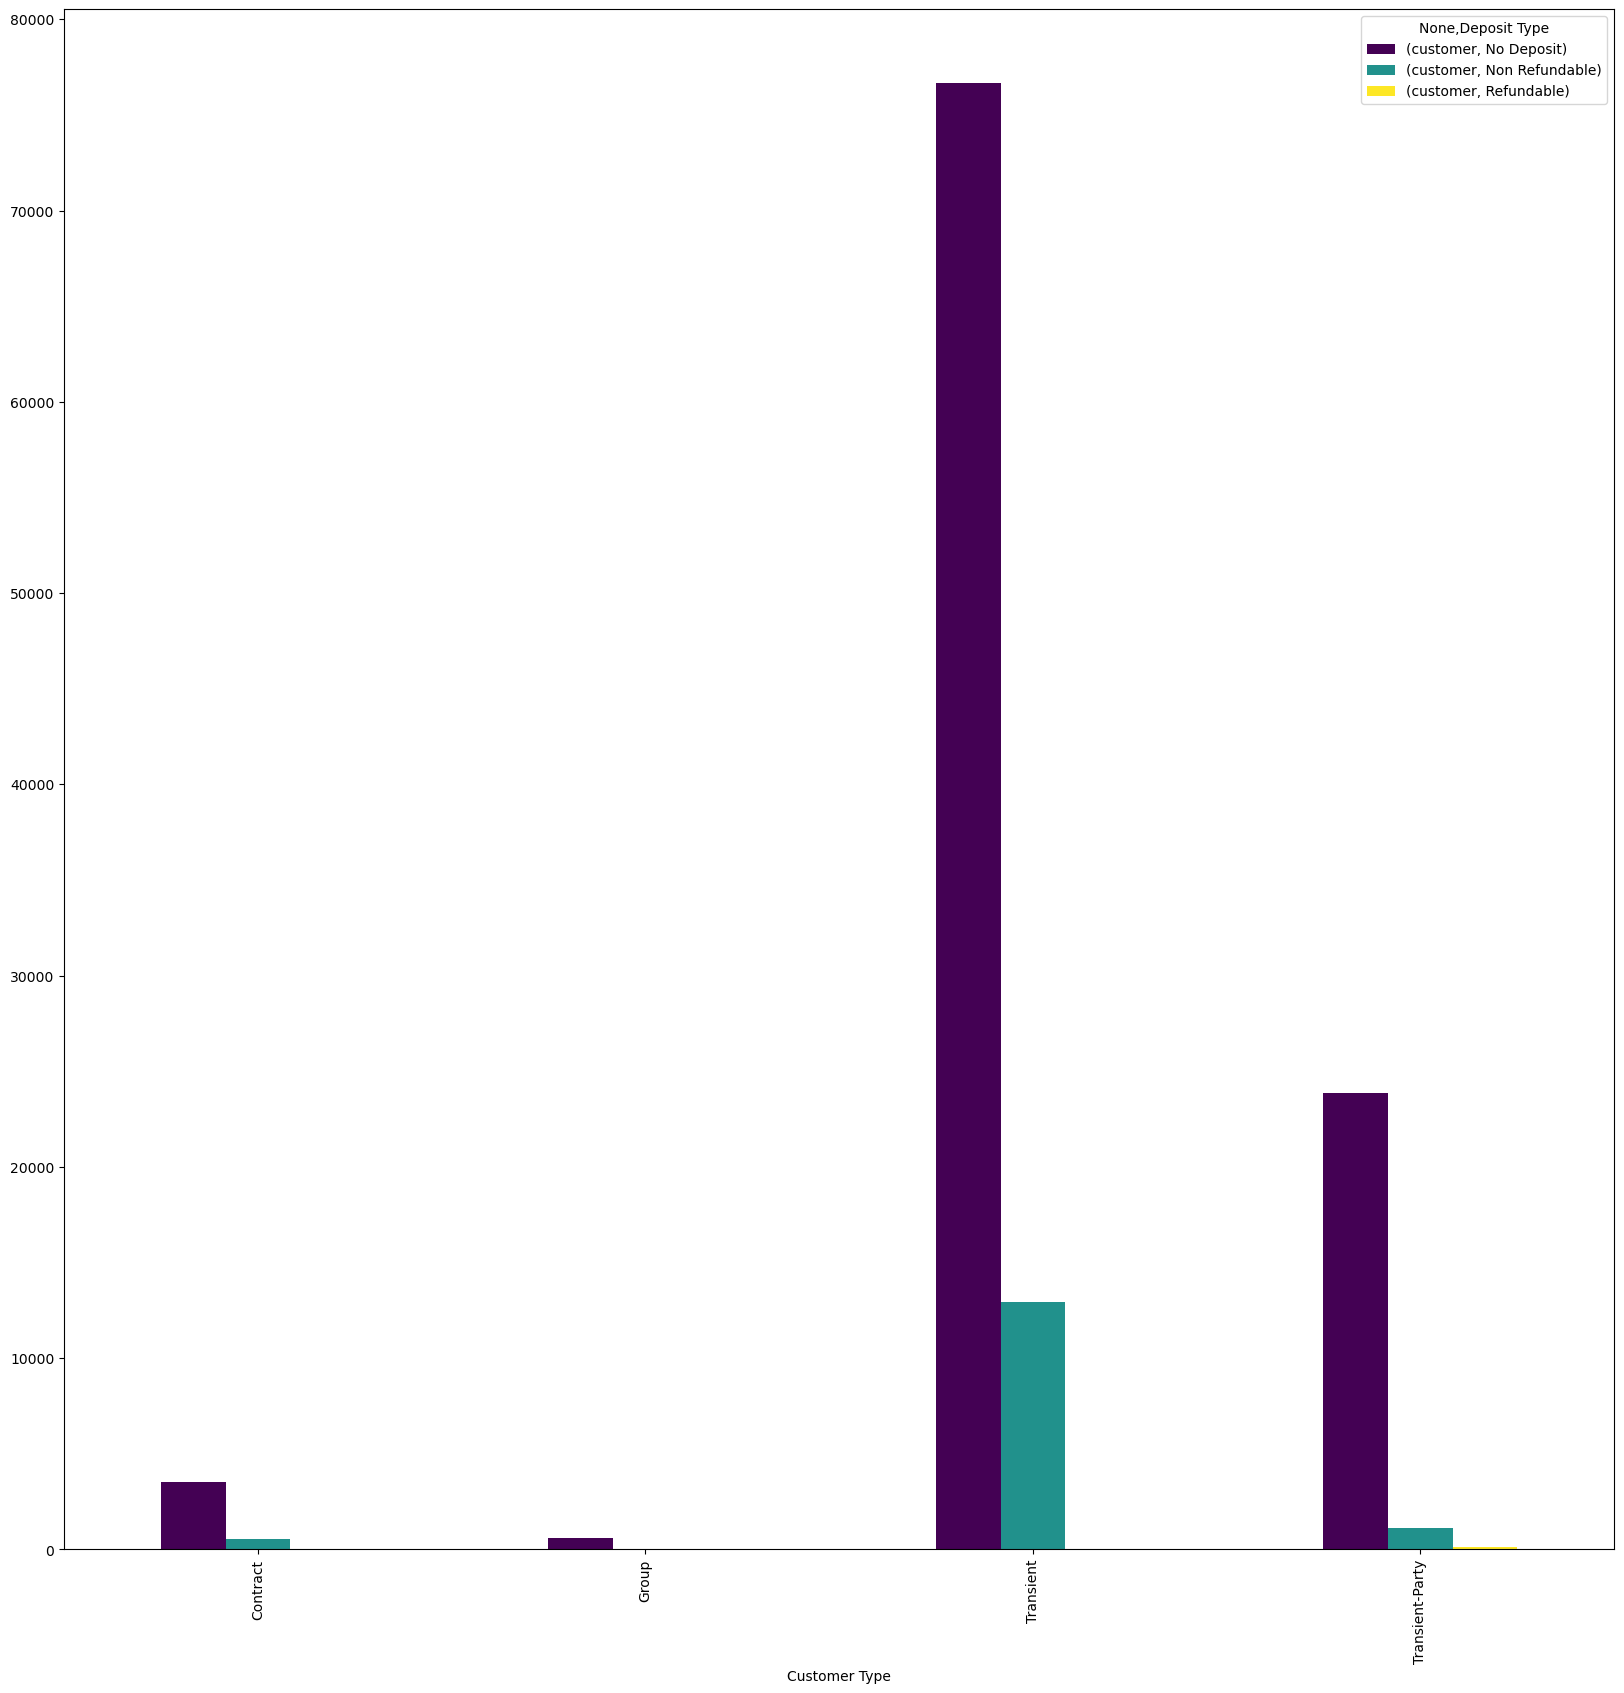

In [129]:
# Set the customer type and deposit type as the indexes
#hh.set_index(["Customer Type", "Deposit Type"], inplace=True)

# Create a bar chart
hh.unstack().plot(kind='bar', colormap='viridis', figsize=(20,20))

<h2> Analysis of Corporate Bookings

●	What is the proportion of corporate bookings, and how does their Average Daily Rate (ADR) compare to other customer types?

In [ ]:
da=data['Avg Daily Rate'].groupby(data['Customer Type']).agg(['sum','mean'])

●	Are there specific trends or patterns related to corporate bookings that can inform business strategies?

In [ ]:
#look at the years of the trend patterns or months where bookings for customrs were high
df=data[data['Customer Type']=='Group']
df.shape

In [ ]:
df['Status'].value_counts()

In [ ]:
data.columns

<b> Customer Type with the most cancellations

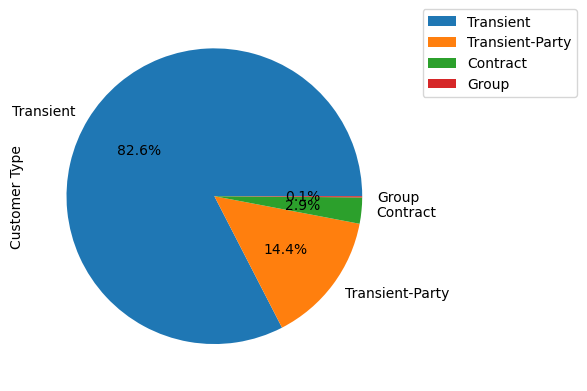

In [130]:
#customer type with the most cancellation
dt=data[data['Cancelled (0/1)']==1]
dt['Customer Type'].value_counts().plot(kind='pie',autopct=('%1.1f%%'))
plt.legend(loc='upper right',bbox_to_anchor=(1.5,1.025))

●	What is the revenue contribution of online travel agents compared to offline travel agents?

In [131]:
dat_rev=data['Revenue'].groupby(data['Distribution Channel']).agg('sum')

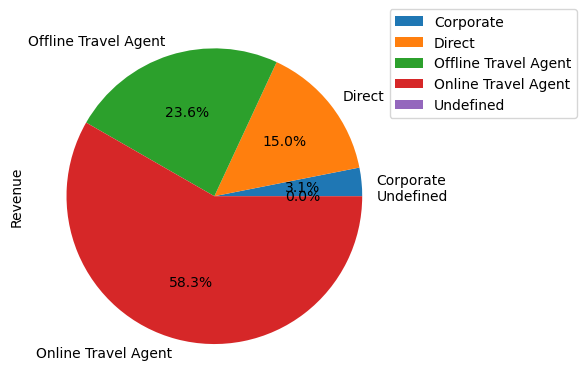

In [132]:
dat_rev.plot(kind='pie',autopct='%1.1f%%')
plt.legend(loc='upper right',bbox_to_anchor=(1.5,1.025))
#then we will say offline contributes so and so percentage to the total revenue compared to online which contributes so and so percentage


●	How do cancellation rates and revenue vary between bookings made through online and offline travel agents?

In [133]:
df_can=data[data['Cancelled (0/1)']==1]

In [134]:
dat_can=df_can['Cancelled (0/1)'].groupby(df_can['Distribution Channel']).agg('count')

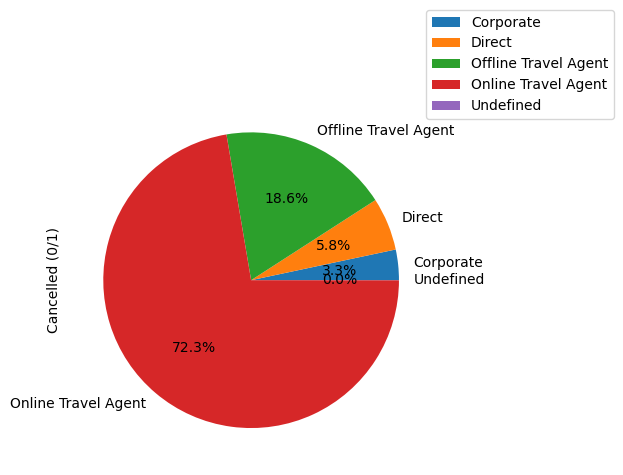

In [138]:
dat_can.plot(kind='pie',autopct='%1.1f%%')
plt.legend(loc='upper right',bbox_to_anchor=(1.5,1.25))